# Check content of ERA5 files on Archer2

Variables read in by NEMO: sn_wndi (uas), sn_wndj (vas), sn_qsr (rsds), sn_qlw (rlds), sn_tair (tas), sn_humi (huss), sn_prec (tprecip), sn_snow (prsn), sn_slp (psl).

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.path as mpath
import cmocean
import glob
import pickle

#### Functions

In [42]:
def plot_var(ax, dataset):
    
    ax.set_title(list(dataset.keys())[0])

    kwags={'transform':ccrs.PlateCarree(), 'rasterized':True, 'cmap':cmocean.cm.deep}
    cm = ax.pcolormesh(dataset.longitude, dataset.latitude, dataset[list(dataset.keys())[0]], **kwags)
    CB = fig.colorbar(cm, ax=ax, fraction=0.04)

#### Load datasets

In [38]:
year        = 1980
folder_ERA  = '/data/oceans_output/shelf/birgal/ERA5/'
files_ERA   = glob.glob(f'{folder_ERA}era5_*')

In [39]:
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

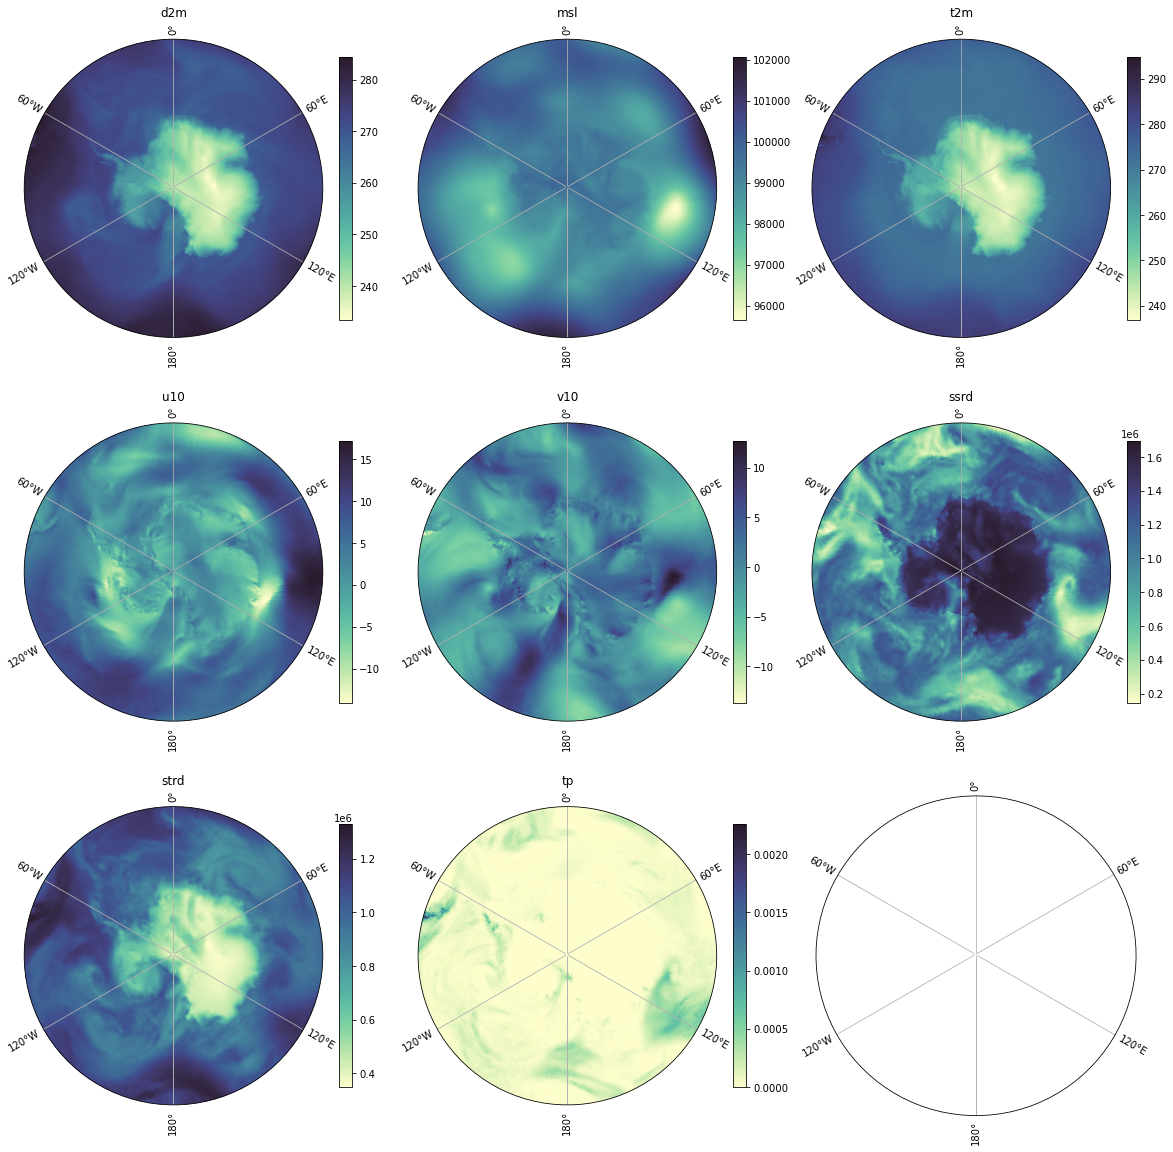

In [44]:
fig, ax = plt.subplots(3,3, figsize=(20,20), subplot_kw={'projection': ccrs.SouthPolarStereo()})

for axis in ax.ravel():
    axis.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    axis.set_boundary(map_circle, transform=axis.transAxes)
    gl = axis.gridlines(draw_labels=True, ylocs=[]);

for f, file in enumerate(files_ERA):
    ERA_dataset = xr.open_dataset(file).sel(latitude=slice(-49, -90)).isel(time=364)
    
    plot_var(ax.ravel()[f], ERA_dataset)